## <span style="color:DarkBlue"><center>Mini Project 2_Plotting Covid-19 cases and deaths by state with best fit curves



<center><span style="color:Olive">Mini Project 2 EDA-CURVE FITTING

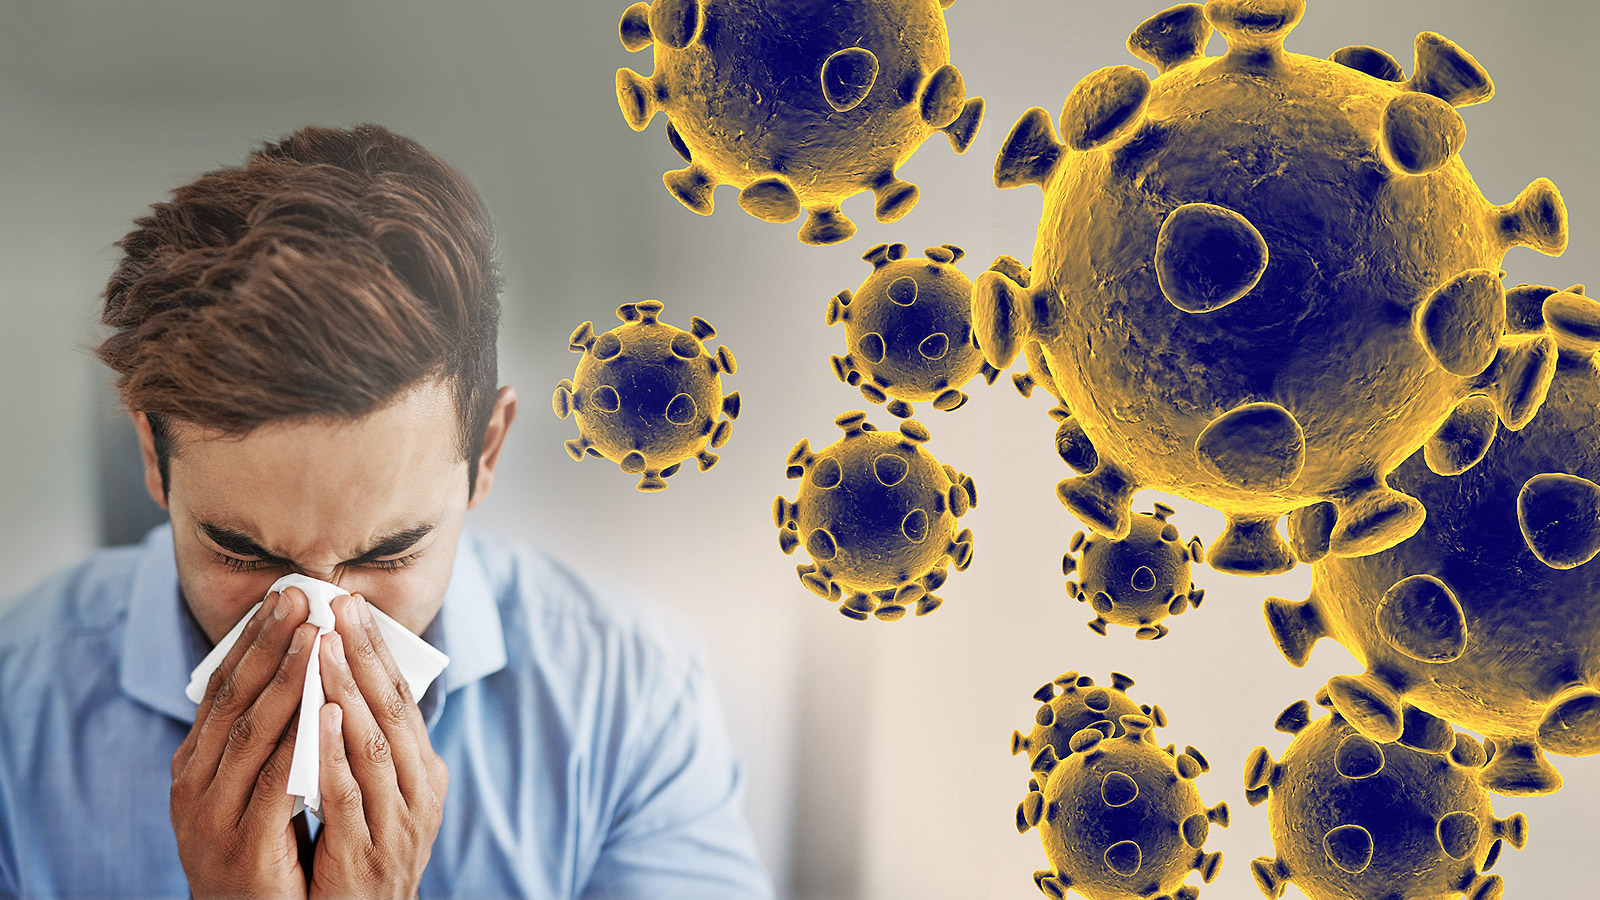

In [1]:
#Importing image
from PIL import Image
from IPython.display import display
cov=Image.open("covid.jpg")
display(cov)

## <span style="color:red"><center>1.Plotting Covid-19 cases and deaths by state with best fit curves

In [2]:
#importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#opening file
csv = "United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv" #url of the .csv file
covid19 = pd.read_csv(csv) # import the .csv file
df = pd.DataFrame(covid19) # build up the pandas dataframe
print(df.columns) #visualize the header

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths'],
      dtype='object')


In [3]:
df.shape#rows and columns

(50361, 15)

In [4]:
df.head()#top 4 rows

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,"621,273","470,516","150,757","19,414","6,964","7,162",NaN,NaN,21,4,01/15/2022 02:59:30 PM,Agree,NaN
1,01/02/2022,AS,11,NaN,NaN,0,0,0,NaN,NaN,0,0,01/03/2022 03:18:16 PM,NaN,NaN
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
3,12/06/2021,MP,"1,104","1,104",0,0,0,5,5,0,2,0,12/08/2021 12:00:00 AM,Agree,Agree
4,05/09/2021,PW,0,NaN,NaN,0,0,0,NaN,NaN,0,0,05/10/2021 02:15:36 PM,NaN,NaN


In [5]:
df.info()#name of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50361 entries, 0 to 50360
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   submission_date  50361 non-null  object
 1   state            50361 non-null  object
 2   tot_cases        50361 non-null  object
 3   conf_cases       27885 non-null  object
 4   prob_cases       27813 non-null  object
 5   new_case         50361 non-null  object
 6   pnew_case        46659 non-null  object
 7   tot_death        50361 non-null  object
 8   conf_death       27448 non-null  object
 9   prob_death       27448 non-null  object
 10  new_death        50361 non-null  object
 11  pnew_death       46691 non-null  object
 12  created_at       50361 non-null  object
 13  consent_cases    41966 non-null  object
 14  consent_deaths   42810 non-null  object
dtypes: object(15)
memory usage: 5.8+ MB


In [6]:
df.describe()#statstics

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
count,50361,50361,50361,27885,27813,50361,46659,50361,27448,27448,50361,46691,50361,41966,42810
unique,860,60,37784,22898,16503,7568,2964,16880,12621,3872,505,320,1913,2,2
top,01/14/2022,AL,0,0,0,0,0,0,0,0,0,0,03/26/2020 04:22:39 PM,Agree,Agree
freq,60,860,3971,766,6400,9929,21637,6426,2057,7185,18040,33153,2888,30030,29468


In [7]:
df_CA = df[df['state'] == 'CA'] #initialize a sub-dataframe for storing only the values for the California

In [8]:
df_CA

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
10539,12/12/2021,CA,"5,133,238","4,867,604","265,634",0,0,"74,509",NaN,NaN,0,0,12/13/2021 03:27:15 PM,Agree,Not agree
10541,02/28/2022,CA,"8,960,997","8,381,196","579,801","19,492",0,"84,700",NaN,NaN,708,0,03/01/2022 03:28:54 PM,Agree,Not agree
10564,09/15/2021,CA,"4,574,136","4,380,566","193,570","7,760",0,"67,001","67,001",0,188,0,09/17/2021 12:00:00 AM,Agree,Agree
10676,06/11/2021,CA,"3,694,498","3,694,498",0,"1,136",0,"62,593","62,593",0,55,0,06/13/2021 12:00:00 AM,Agree,Agree
10683,06/08/2021,CA,"3,691,660","3,691,660",0,792,0,"62,479","62,479",0,6,0,06/10/2021 12:00:00 AM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34707,12/24/2021,CA,"5,264,182","4,990,016","274,166","20,401",0,"75,461",NaN,NaN,78,0,12/25/2021 02:11:33 PM,Agree,Not agree
34719,01/28/2022,CA,"8,213,786","7,706,395","507,391","76,729",0,"78,825",NaN,NaN,254,0,01/29/2022 02:30:49 PM,Agree,Not agree
34765,10/09/2020,CA,"838,606","838,606",0,"3,806",0,"16,298","16,298",0,73,0,10/11/2020 12:00:00 AM,Agree,Agree
34778,08/29/2020,CA,"693,839","693,839",0,"4,981",0,"12,569","12,569",0,108,0,08/31/2020 12:00:00 AM,Agree,Agree


In [9]:
df_CA.shape

(839, 15)

In [10]:
tot_cases = np.array((df_CA['tot_cases'])) #create an array with the total no of cases
days = np.linspace(0, len(tot_cases), len(tot_cases)) # array containing the no of days from the first recording

In [11]:
tot_cases

array(['5,133,238', '8,960,997', '4,574,136', '3,694,498', '3,691,660',
       '9,084,834', '739,527', '4,885,289', '4,653,610', '586,056',
       '122,901', '9,105,181', '5,041,193', '5,084,927', '1,389,707',
       '9,140,562', '26,182', '3,553,307', '12,026', '4,429,964',
       '2,781,039', '538,416', '4,276,720', '3,484,963', '10,566',
       '3,656,967', '23,253', '3,555,915', '9,115,022', '3,677,235', '6',
       '3,661,675', '8,775,930', '944,576', '4,653,610', '7,570,538',
       '3,465,726', '4,676,579', '247', '722,283', '5,844,204',
       '4,826,113', '904,198', '4,554,525', '3,559,193', '5,264,182',
       '5,204,695', '3,428,518', '760,013', '4,749,201', '1,286,557',
       '514,901', '4,972,469', '1,854,456', '3,659,641', '9,155,320',
       '8,867,026', '312,344', '3,294,447', '6', '165,416', '4,515,931',
       '4,355,018', '485,502', '8,545,237', '3,085,040', '133',
       '8,941,505', '4,466,363', '991,609', '3,688,893', '4,497,019',
       '4,382,003', '6', '8,987,

In [12]:
len(tot_cases)

839

In [13]:
days

array([  0.        ,   1.00119332,   2.00238663,   3.00357995,
         4.00477327,   5.00596659,   6.0071599 ,   7.00835322,
         8.00954654,   9.01073986,  10.01193317,  11.01312649,
        12.01431981,  13.01551313,  14.01670644,  15.01789976,
        16.01909308,  17.0202864 ,  18.02147971,  19.02267303,
        20.02386635,  21.02505967,  22.02625298,  23.0274463 ,
        24.02863962,  25.02983294,  26.03102625,  27.03221957,
        28.03341289,  29.03460621,  30.03579952,  31.03699284,
        32.03818616,  33.03937947,  34.04057279,  35.04176611,
        36.04295943,  37.04415274,  38.04534606,  39.04653938,
        40.0477327 ,  41.04892601,  42.05011933,  43.05131265,
        44.05250597,  45.05369928,  46.0548926 ,  47.05608592,
        48.05727924,  49.05847255,  50.05966587,  51.06085919,
        52.06205251,  53.06324582,  54.06443914,  55.06563246,
        56.06682578,  57.06801909,  58.06921241,  59.07040573,
        60.07159905,  61.07279236,  62.07398568,  63.07

In [14]:
len(days)

839

In [15]:
d = {

"days": pd.Series(days, index=None),
"tot_cases": pd.Series(tot_cases, index=None),
}

In [16]:
d

{'days': 0        0.000000
 1        1.001193
 2        2.002387
 3        3.003580
 4        4.004773
           ...    
 834    834.995227
 835    835.996420
 836    836.997613
 837    837.998807
 838    839.000000
 Length: 839, dtype: float64,
 'tot_cases': 0      5,133,238
 1      8,960,997
 2      4,574,136
 3      3,694,498
 4      3,691,660
          ...    
 834    5,264,182
 835    8,213,786
 836      838,606
 837      693,839
 838    5,947,810
 Length: 839, dtype: object}

In [17]:
df2 = pd.DataFrame(d)# columns=["tot_cases", "days"])
df2

,days,tot_cases
0,0.000000,"5,133,238"
1,1.001193,"8,960,997"
2,2.002387,"4,574,136"
3,3.003580,"3,694,498"
4,4.004773,"3,691,660"
...,...,...
834,834.995227,"5,264,182"
835,835.996420,"8,213,786"
836,836.997613,"838,606"
837,837.998807,"693,839"


In [18]:
df2["tot_cases"] = df2['tot_cases'].str.replace(',', '').astype(float)

In [19]:
df2["tot_cases"]

0      5133238.0
1      8960997.0
2      4574136.0
3      3694498.0
4      3691660.0
         ...    
834    5264182.0
835    8213786.0
836     838606.0
837     693839.0
838    5947810.0
Name: tot_cases, Length: 839, dtype: float64

In [20]:
df2["days"][:200]

0        0.000000
1        1.001193
2        2.002387
3        3.003580
4        4.004773
          ...    
195    195.232697
196    196.233890
197    197.235084
198    198.236277
199    199.237470
Name: days, Length: 200, dtype: float64

In [21]:
#DEFINITION OF THE FITTING FUNCTION
def exp_fit(x, a, b, c):
    y = a*np.exp(b*x) + c
    return y

In [22]:
#----CALL THE FITTING FUNCTION----
fit = curve_fit(exp_fit, df2["days"][:122], df2["tot_cases"][:122], p0 = [0.005, 0.03, 5])
fit_eq = fit[0][0]*np.exp(fit[0][1]*df2["days"][:122])+fit[0][2]

C:\Users\Intel\.conda\envs\datascience\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


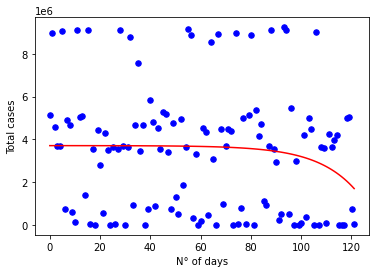

In [23]:
#----PLOTTING-------
fig = plt.figure()
ax = fig.subplots()
ax.scatter(df2["days"][:122], df2["tot_cases"][:122], color = 'b', s = 30)
ax.plot(df2["days"][:122], fit_eq, color = 'r', alpha = 1)
ax.set_ylabel('Total cases')
ax.set_xlabel('N° of days')
plt.show()

## <span style="color:orange"><center>2.APPLYING AN RANDOM EXPONENTIAL DISTRIBUTION FIT TO A HISTOGRAM

In [24]:
#-----APPLY AN EXPONENTIAL FIT TO A HISTOGRAM--------
data = np.random.exponential(5, size=10000) #generating a random exponential distribution
hist = np.histogram(data, bins="auto")[0] #generating a histogram from the exponential distribution
x = np.arange(0, len(hist), 1) # generating an array that contains the coordinated of the left edge of each bar

In [25]:
#---DECAYING FIT OF THE DISTRIBUTION----
def exp_fit(x,a,b): #defining a decaying exponential function
    y = a*np.exp(-b*x)
    return y
x_fit = x + x[1]/2 # the point of the fit will be positioned at the center of the bins
fit_ = curve_fit(exp_fit,x_fit,hist) # calling the fit function
fit_eq = fit_[0][0]*np.exp(-fit_[0][1]*x_fit) # building the y-array of the fit

C:\Users\Intel\AppData\Local\Temp\ipykernel_11700\3526683445.py:3: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*x)


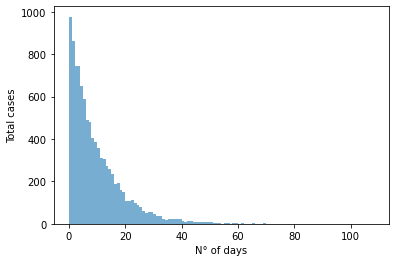

In [26]:
#ploting
plt.bar(x,hist, alpha = 0.6, align = 'edge', width = 1)
plt.ylabel('Total cases')
plt.xlabel('N° of days')
plt.show()

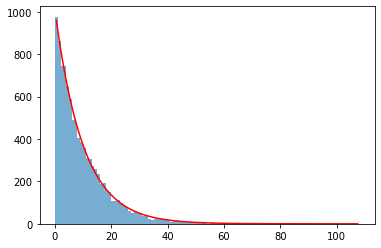

In [27]:
#Plotting
plt.bar(x,hist, alpha = 0.6, align = 'edge', width = 1)
plt.plot(x_fit,fit_eq, color = 'red')
plt.show()

## <span style="color:orange"><center>Conclusion

The graph is declining as people taking more precaution day by day 

#  <span style="color:red"><center>THANK YOU :-)